# Titanic Survivors

### Objectives :
* Clean the data.
* Visualize the data.
* Feature engineering.
* Modeling and predicting with sklearn.
* Compare models.

### Let's start with importing the librairies and packages needed :

In [2]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid') # better visualization


#### Let's load and a look at our datasets :
* training : test and define our models
* testing : validate models

In [3]:
training = pd.read_csv('train.csv')
testing = pd.read_csv('test.csv')

In [4]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Let's have a look at the keys of both dataframe



In [6]:
print(training.keys())
print(testing.keys())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


First of all, we need to check our Df for missing values :

In [7]:
def null_value(training, testing):
    print('Training DF missing value :')
    print(pd.isnull(training).sum())
    print('\n')
    print('Testing DF missing value :')
    print(pd.isnull(testing).sum())
    
null_value(training, testing)

Training DF missing value :
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Testing DF missing value :
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


We have a lot of missing values in Cabin field... We should probably drop them because filling them would be impossible.

We also have missing values in the age section, this feature is very important to predict survival odds, we will fill those missing values by inspecting the age distribution !

We'll drop the 'ticket' field, which is the ticket number, it is not a usefull feature.

In [8]:
training.drop(labels = ['Cabin','Ticket'], axis=1, inplace=True)
testing.drop(labels = ['Cabin','Ticket'], axis=1, inplace=True)

In [9]:
# inplace argument is used to specified that we want the changes in our existing DataFrame

In [10]:
null_value(training, testing)

Training DF missing value :
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64


Testing DF missing value :
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


### Time to fill up ages

/home/allan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


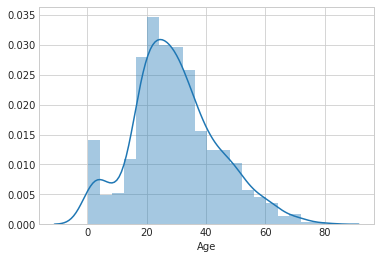

In [11]:
copy = training.copy()
copy.dropna(inplace = True)
sns.distplot(copy["Age"])

This distribution is a little skewed right, we can accept to fill NA value with the median.

In [12]:
training['Age'].fillna(training['Age'].median(), inplace=True)
testing['Age'].fillna(testing['Age'].median(), inplace=True)
# We will also fill the few missing datas in test['Fare'] and training['Embarked']
training['Embarked'].fillna('S', inplace=True)
testing['Fare'].fillna(testing['Fare'].median(), inplace=True)

In [13]:
null_value(training,testing)

Training DF missing value :
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


Testing DF missing value :
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


#### We don't have any missing values ! We can start plotting and visualizing Data :

We will make different graphs to look into each features :
* Gender :

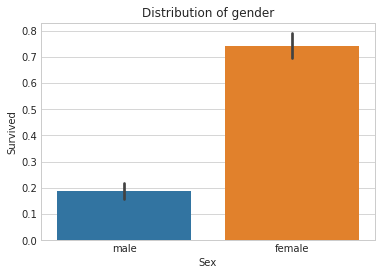

In [14]:
sns.barplot(x='Sex',y='Survived', data=training)
plt.title('Distribution of gender')
plt.show()

In [15]:
total_survived_females = training[training.Sex == "female"]["Survived"].sum()
total_survived_males = training[training.Sex == "male"]["Survived"].sum()

print("Total people survived is: " + str((total_survived_females + total_survived_males)))
print("Proportion of Females who survived:") 
print(total_survived_females/(total_survived_females + total_survived_males))
print("Proportion of Males who survived:")
print(total_survived_males/(total_survived_females + total_survived_males))

Total people survived is: 342
Proportion of Females who survived:
0.6812865497076024
Proportion of Males who survived:
0.31871345029239767


As we can see, the gender had a great impact on survivability. It'll be a feature used in our models.

* Class :

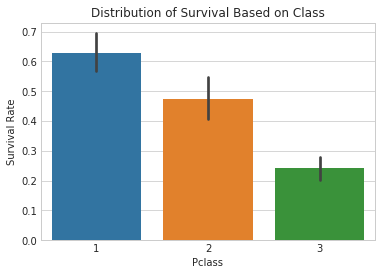

Total people survived is: 342
Proportion of Class 1 Passengers who survived:
0.39766081871345027
Proportion of Class 2 Passengers who survived:
0.2543859649122807
Proportion of Class 3 Passengers who survived:
0.347953216374269


In [16]:
sns.barplot(x="Pclass", y="Survived", data=training)
plt.ylabel("Survival Rate")
plt.title("Distribution of Survival Based on Class")
plt.show()

total_survived_one = training[training.Pclass == 1]["Survived"].sum()
total_survived_two = training[training.Pclass == 2]["Survived"].sum()
total_survived_three = training[training.Pclass == 3]["Survived"].sum()
total_survived_class = total_survived_one + total_survived_two + total_survived_three

print("Total people survived is: " + str(total_survived_class))
print("Proportion of Class 1 Passengers who survived:") 
print(total_survived_one/total_survived_class)
print("Proportion of Class 2 Passengers who survived:")
print(total_survived_two/total_survived_class)
print("Proportion of Class 3 Passengers who survived:")
print(total_survived_three/total_survived_class)

Let's combince class and gender :

Text(0.5,1,'Survival Rates Based on Gender and Class')

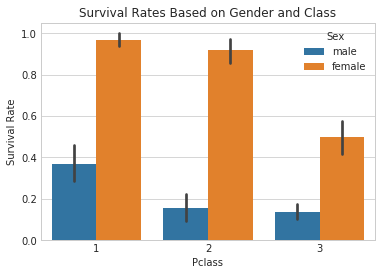

In [17]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=training)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

Or like this :

Text(0.5,1,'Survival Rates Based on Gender and Class')

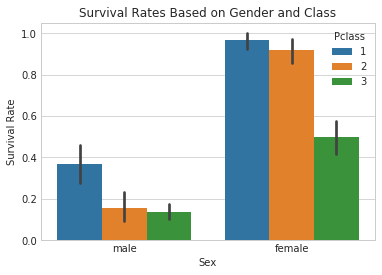

In [18]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=training)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")


#### As we can see, the survival odds are greater for people in first class !

* Age :

/home/allan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/allan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


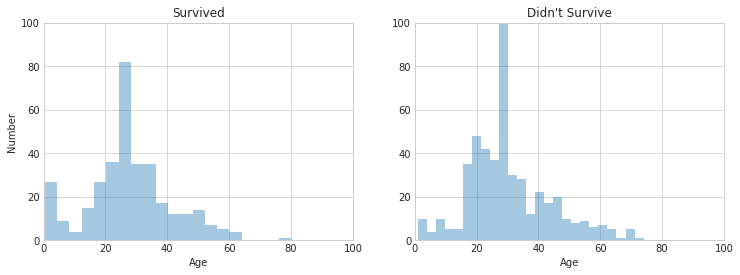

In [19]:
survived_ages = training[training.Survived == 1]["Age"]
not_survived_ages = training[training.Survived == 0]["Age"]
plt.subplot(1, 2, 1)
sns.distplot(survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Survived")
plt.ylabel("Number")
plt.subplot(1, 2, 2)
sns.distplot(not_survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Didn't Survive")
plt.subplots_adjust(right=1.7)
plt.show()

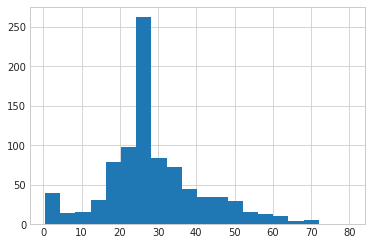

In [20]:
training['Age'].hist(bins=20)

The distribution of ages is very similar in every situation.

## Feature Engineering 
We need to represent categorical as values to perform our classification with the model !

Let's change the gender to binary and embarked to 0,1,2.

In [21]:
training.loc[training["Sex"] == "male", "Sex"] = 0
training.loc[training["Sex"] == "female", "Sex"] = 1

training.loc[training["Embarked"] == "S", "Embarked"] = 0
training.loc[training["Embarked"] == "C", "Embarked"] = 1
training.loc[training["Embarked"] == "Q", "Embarked"] = 2

testing.loc[testing["Sex"] == "male", "Sex"] = 0
testing.loc[testing["Sex"] == "female", "Sex"] = 1

testing.loc[testing["Embarked"] == "S", "Embarked"] = 0
testing.loc[testing["Embarked"] == "C", "Embarked"] = 1
testing.loc[testing["Embarked"] == "Q", "Embarked"] = 2

We can merge siblings and parch as one feature, Family.

And then is this feature is equal to 1, we can create an IsAlone feature to see if being in group help in survival.

In [22]:
training["FamSize"] = training["SibSp"] + training["Parch"] + 1
testing["FamSize"] = testing["SibSp"] + testing["Parch"] + 1
# The 1 is for the traveler
training["IsAlone"] = training.FamSize.apply(lambda x: 1 if x == 1 else 0)
testing["IsAlone"] = testing.FamSize.apply(lambda x: 1 if x == 1 else 0)

Let's have a look !

In [23]:
training.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone
756,757,0,3,"Carlsson, Mr. August Sigfrid",0,28.0,0,0,7.7958,0,1,1
255,256,1,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",1,29.0,0,2,15.2458,1,3,0
790,791,0,3,"Keane, Mr. Andrew ""Andy""",0,28.0,0,0,7.7500,2,1,1
332,333,0,1,"Graham, Mr. George Edward",0,38.0,0,1,153.4625,0,2,0
464,465,0,3,"Maisner, Mr. Simon",0,28.0,0,0,8.0500,0,1,1


We can see that the age and the fare are highly different from other data, it could reduce the accuracy of our model, so we can scale them to a more representative data :

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#scaler requires arguments to be in a specific format shown below
#convert columns into numpy arrays and reshape them 
ages_train = np.array(training["Age"]).reshape(-1, 1)
fares_train = np.array(training["Fare"]).reshape(-1, 1)
ages_test = np.array(testing["Age"]).reshape(-1, 1)
fares_test = np.array(testing["Fare"]).reshape(-1, 1)

#we replace the original column with the transformed/scaled values
training["Age"] = scaler.fit_transform(ages_train)
training["Fare"] = scaler.fit_transform(fares_train)
testing["Age"] = scaler.fit_transform(ages_test)
testing["Fare"] = scaler.fit_transform(fares_test)

# Model fitting, optimizing and predicting 

Now that we have formmated and understood our data, let's use sklearn models to test predictions accuracy.

#### Import sklearn models :

In [25]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

we can import make_scorer, accuracy_score from sklearn metrics to evaluate our model performance

In [26]:
from sklearn.metrics import make_scorer, accuracy_score

We can also use a GridSearch cross validation to find the optimal parameters for the model we choose to work with and use to predict on our testing set.

In [27]:
from sklearn.model_selection import GridSearchCV


### Let's define our target and features for training and testing :

In [28]:
features = ['Pclass','Sex','Age','Embarked','Fare','FamSize', 'IsAlone']
X_train = training[features]
y_train = training['Survived']
X_test = testing[features]
# we are looking for y_test

### Validation data

In [29]:
from sklearn.model_selection import train_test_split #to create validation data set

X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0) #X_valid and y_valid are the validation sets

#### SVC model (support vector classification) :

In [30]:
svc_clf = SVC() 

parameters_svc = {"kernel": ["rbf", "linear"], "probability": [True, False], "verbose": [True, False]}

grid_svc = GridSearchCV(svc_clf, parameters_svc, scoring=make_scorer(accuracy_score))
grid_svc.fit(X_training, y_training)

svc_clf = grid_svc.best_estimator_

svc_clf.fit(X_training, y_training)
pred_svc = svc_clf.predict(X_valid)
acc_svc = accuracy_score(y_valid, pred_svc)


[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [31]:
print("The Score for SVC is: " + str(acc_svc))

The Score for SVC is: 0.8100558659217877


Just as an info, scaling age and fare add 0,02 at this score !

### LinearSVC model :

In [32]:
linsvc_clf = LinearSVC()

parameters_linsvc = {"multi_class": ["ovr", "crammer_singer"], "fit_intercept": [True, False], "max_iter": [100, 500, 1000, 1500]}

grid_linsvc = GridSearchCV(linsvc_clf, parameters_linsvc, scoring=make_scorer(accuracy_score))
grid_linsvc.fit(X_training, y_training)

linsvc_clf = grid_linsvc.best_estimator_

linsvc_clf.fit(X_training, y_training)
pred_linsvc = linsvc_clf.predict(X_valid)
acc_linsvc = accuracy_score(y_valid, pred_linsvc)

print("The Score for LinearSVC is: " + str(acc_linsvc))

The Score for LinearSVC is: 0.7988826815642458


### Random Forest Model :

In [52]:
rf_clf = RandomForestClassifier()

parameters_rf = {"n_estimators": [7, 8, 9, 10, 15], "criterion": ["gini", "entropy"], "max_features": ["auto", "sqrt", "log2"], 
                 "max_depth": [3, 5, 10], "min_samples_split": [ 3, 5, 10]}

grid_rf = GridSearchCV(rf_clf, parameters_rf, scoring=make_scorer(accuracy_score))
grid_rf.fit(X_training, y_training)

rf_clf = grid_rf.best_estimator_

rf_clf.fit(X_training, y_training)
pred_rf = rf_clf.predict(X_valid)
acc_rf = accuracy_score(y_valid, pred_rf)

print("The Score for Random Forest is: " + str(acc_rf))

The Score for Random Forest is: 0.8212290502793296


### Logistic Regression Model :

In [83]:
logreg_clf = LogisticRegression()

parameters_logreg = {"penalty": ["l2"], "fit_intercept": [True, False], "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
                     "max_iter": [50, 100,150, 200], "warm_start": [True, False]}

grid_logreg = GridSearchCV(logreg_clf, parameters_logreg, scoring=make_scorer(accuracy_score))
grid_logreg.fit(X_training, y_training)

logreg_clf = grid_logreg.best_estimator_

logreg_clf.fit(X_training, y_training)
pred_logreg = logreg_clf.predict(X_valid)
acc_logreg = accuracy_score(y_valid, pred_logreg)

print("The Score for Logistic Regression is: " + str(acc_logreg))

/home/allan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/allan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/allan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/allan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/allan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reac

/home/allan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/allan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/allan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/allan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/allan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reac

The Score for Logistic Regression is: 0.8044692737430168


/home/allan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/allan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/allan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/allan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


### KNeighbors Model :

In [35]:
knn_clf = KNeighborsClassifier()

parameters_knn = {"n_neighbors": [3, 5, 10, 15], "weights": ["uniform", "distance"], "algorithm": ["auto", "ball_tree", "kd_tree"],
                  "leaf_size": [20, 30, 50]}

grid_knn = GridSearchCV(knn_clf, parameters_knn, scoring=make_scorer(accuracy_score))
grid_knn.fit(X_training, y_training)

knn_clf = grid_knn.best_estimator_

knn_clf.fit(X_training, y_training)
pred_knn = knn_clf.predict(X_valid)
acc_knn = accuracy_score(y_valid, pred_knn)

print("The Score for KNeighbors is: " + str(acc_knn))

The Score for KNeighbors is: 0.7821229050279329


### GaussianNB model :

In [36]:
gnb_clf = GaussianNB()

parameters_gnb = {}

grid_gnb = GridSearchCV(gnb_clf, parameters_gnb, scoring=make_scorer(accuracy_score))
grid_gnb.fit(X_training, y_training)

gnb_clf = grid_gnb.best_estimator_

gnb_clf.fit(X_training, y_training)
pred_gnb = gnb_clf.predict(X_valid)
acc_gnb = accuracy_score(y_valid, pred_gnb)

print("The Score for Gaussian NB is: " + str(acc_gnb))

The Score for Gaussian NB is: 0.8156424581005587


### Decision Tree model :

In [37]:
dt_clf = DecisionTreeClassifier()

parameters_dt = {"criterion": ["gini", "entropy"], "splitter": ["best", "random"], "max_features": ["auto", "sqrt", "log2"]}

grid_dt = GridSearchCV(dt_clf, parameters_dt, scoring=make_scorer(accuracy_score))
grid_dt.fit(X_training, y_training)

dt_clf = grid_dt.best_estimator_

dt_clf.fit(X_training, y_training)
pred_dt = dt_clf.predict(X_valid)
acc_dt = accuracy_score(y_valid, pred_dt)

print("The Score for Decision Tree is: " + str(acc_dt))

The Score for Decision Tree is: 0.7988826815642458


### XGBoost model :

In [73]:
from xgboost import XGBClassifier

xg_clf = XGBClassifier()

parameters_xg = {"objective" : ["reg:linear"], "n_estimators" : [5, 10, 15, 20, 25]}

grid_xg = GridSearchCV(xg_clf, parameters_xg, scoring=make_scorer(accuracy_score))
grid_xg.fit(X_training, y_training)

xg_clf = grid_xg.best_estimator_

xg_clf.fit(X_training, y_training)
pred_xg = xg_clf.predict(X_valid)
acc_xg = accuracy_score(y_valid, pred_xg)

print("The Score for XGBoost is: " + str(acc_xg))

The Score for XGBoost is: 0.8268156424581006


/home/allan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/allan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/allan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/allan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambig

### Evaluating Models Performance

Let's compare the performance of each model.

In [84]:
model_performance = pd.DataFrame({
    "Model": ["SVC", "Linear SVC", "Random Forest", 
              "Logistic Regression", "K Nearest Neighbors", "Gaussian Naive Bayes",  
              "Decision Tree", "XGBClassifier"],
    "Accuracy": [acc_svc, acc_linsvc, acc_rf, 
              acc_logreg, acc_knn, acc_gnb, acc_dt, acc_xg]
})

model_performance.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy
7,XGBClassifier,0.826816
2,Random Forest,0.821229
5,Gaussian Naive Bayes,0.815642
0,SVC,0.810056
3,Logistic Regression,0.804469
1,Linear SVC,0.798883
6,Decision Tree,0.798883
4,K Nearest Neighbors,0.782123


In our situation, the most accurate model is Random Forest !

* After changes, XGB booster is more accurate, so i changed it, and won like 5000 places on Kaggle leaderboard
* I tried to submit the other algorithm to see if XGBoost was more accurate, but finally it's the most accurate i could find in this example.

### Let's submit our result to Kaggle !

We will create a dataframe to submit :

In [88]:
xg_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=20,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [89]:
submission_predictions = xg_clf.predict(X_test)

/home/allan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [90]:
submission = pd.DataFrame({
        "PassengerId": testing["PassengerId"],
        "Survived": submission_predictions
    })

submission.to_csv("titanic.csv", index=False)
print(submission.shape)

(418, 2)


The file we will submit is titanic.csv

It will look like this :

In [78]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
